In [5]:
import numpy as np

# dummy tensor field
# make tensor pointing vertically
up = np.array([[10,0,0],
              [0,1,0],
              [0,0,1]])

# make tensor pointing horizontally
right = np.array([[1,0,0],
              [0,10,0],
              [0,0,1]])

# identity
id = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

# initialize tensor field
T = np.zeros((6,6,2,3,3))

T[1:3, 1:5, ...] = up
T[3:5, 1:5, ...] = right
T[:1,...] = id # pad the edges with the identity matrix
T[5:,...] = id
T[:,:1,...] = id
T[:,5:,...] = id


<IPython.core.display.Javascript object>


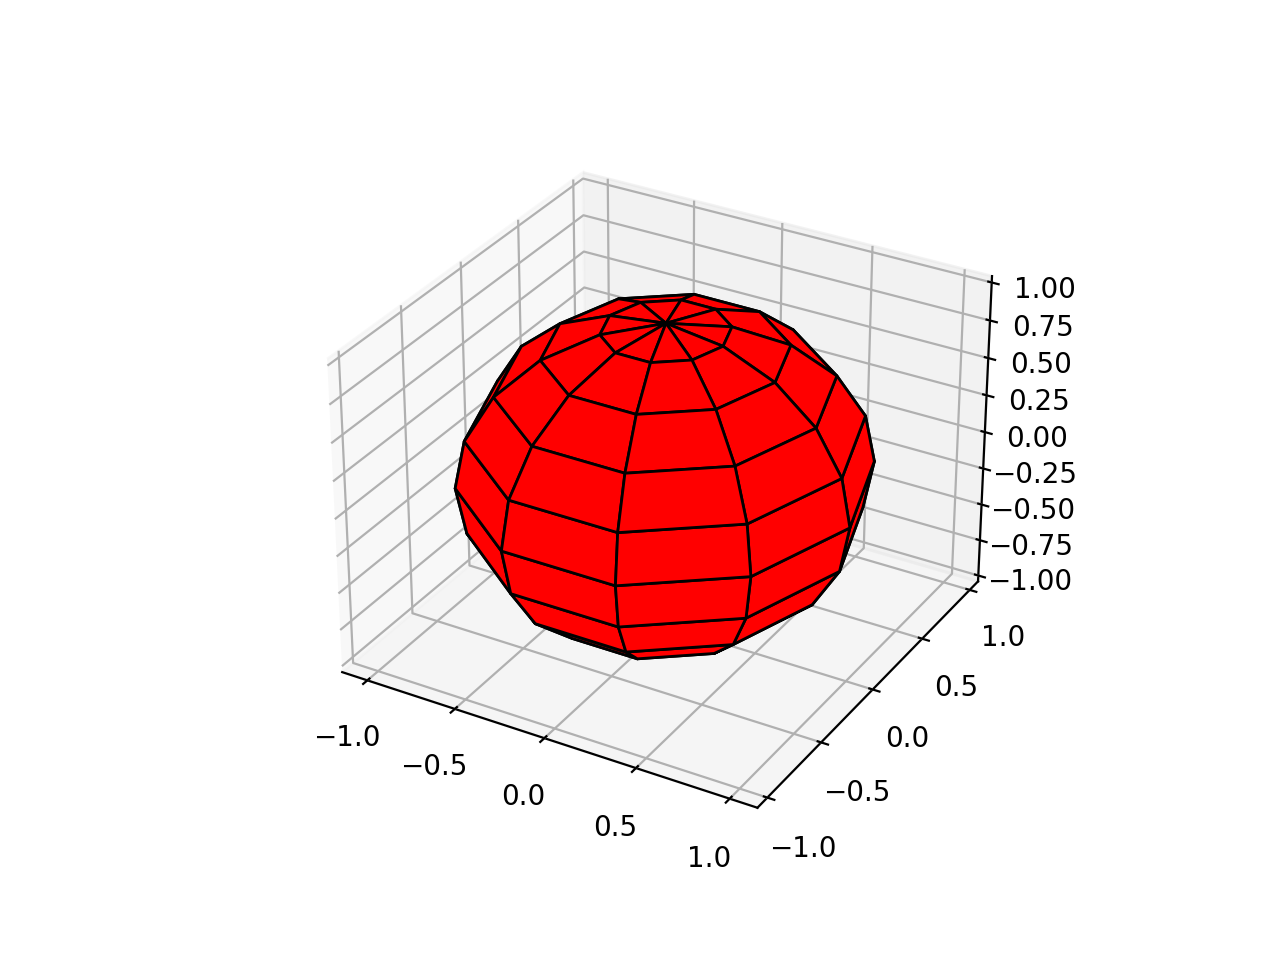

In [6]:
# now we have to draw ellipses
# first draw a square
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.linalg import sqrtm
f = plt.figure()
ax = f.add_subplot(projection='3d')

n0 = 10
n1 = 10
t0 = np.arange(n0+1)/n0 * 2.0*np.pi # alpha
t1 = np.arange(n1+1)/n1 * np.pi # polar
T0,T1 = np.meshgrid(t0,t1,indexing='ij')
Y0 = np.sin(T1)*np.cos(T0)
Y1 = np.sin(T1)*np.sin(T0)
Y2 = np.cos(T1)
ax.plot_surface(Y0,Y1,Y2,shade=False,color='r',edgecolor='k')

w,v = np.linalg.eigh(T)
trace = np.sum(w,-1)

R = T/np.trace(T,axis1=-1,axis2=-2)[...,None,None]
FA = np.sqrt(0.5*(3.0 - 1.0/np.trace(R@R,axis1=-1,axis2=-2)))
FA[np.isnan(FA)] = 0

In [38]:
# create grid
xI = []
for i in range(3):
    x = np.arange(T.shape[i]) - (T.shape[i]-1)/2
    xI.append(x)
X = np.stack(np.meshgrid(xI[0],xI[1],xI[2]),axis=-1)

# make rotation matrices
theta = np.pi / 4
Rz = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta), np.cos(theta), 0],
              [0,0,1]])
Ry = np.array([[np.cos(theta), 0, np.sin(theta)],
              [0, 1, 0],
              [-np.sin(theta),0,np.cos(theta)]])
Rx = np.array([[1,0,0],
               [0, np.cos(theta), -np.sin(theta)],
               [0, np.sin(theta), np.cos(theta)]])
id = np.array([[1,0,0],
                [0,1,0],
                [0,0,1]])

# rotate grid 45 degrees about z axis
dv = [1.,1.,1.]
Xrot = (id @ X[...,None])[...,0].transpose(3,0,1,2)

jacobian = lambda X,dv : np.stack(np.gradient(X[0], dv[0],dv[1],dv[2], axis=(0,1,2))).transpose(2,3,4,0,1)
J = jacobian(Xrot[None], dv)

In [56]:
print(Xrot.shape)
J = np.stack(np.gradient(Xrot[2], dv[0],dv[1],dv[2]),axis=-1)
print(J.shape)
print(J)

(3, 6, 6, 2)
(6, 6, 2, 3)
[[[[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]]


 [[[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]]


 [[[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]]


 [[[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]]


 [[[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]]


 [[[0. 0. 1.]
   [0. 0. 1.]]

  [[0. 0. 1.]
   [0. 0. 1.]]

  [[

In [37]:
print(Xrot)

[[[[-2.5 -2.5 -0.5]
   [-2.5 -2.5  0.5]]

  [[-1.5 -2.5 -0.5]
   [-1.5 -2.5  0.5]]

  [[-0.5 -2.5 -0.5]
   [-0.5 -2.5  0.5]]

  [[ 0.5 -2.5 -0.5]
   [ 0.5 -2.5  0.5]]

  [[ 1.5 -2.5 -0.5]
   [ 1.5 -2.5  0.5]]

  [[ 2.5 -2.5 -0.5]
   [ 2.5 -2.5  0.5]]]


 [[[-2.5 -1.5 -0.5]
   [-2.5 -1.5  0.5]]

  [[-1.5 -1.5 -0.5]
   [-1.5 -1.5  0.5]]

  [[-0.5 -1.5 -0.5]
   [-0.5 -1.5  0.5]]

  [[ 0.5 -1.5 -0.5]
   [ 0.5 -1.5  0.5]]

  [[ 1.5 -1.5 -0.5]
   [ 1.5 -1.5  0.5]]

  [[ 2.5 -1.5 -0.5]
   [ 2.5 -1.5  0.5]]]


 [[[-2.5 -0.5 -0.5]
   [-2.5 -0.5  0.5]]

  [[-1.5 -0.5 -0.5]
   [-1.5 -0.5  0.5]]

  [[-0.5 -0.5 -0.5]
   [-0.5 -0.5  0.5]]

  [[ 0.5 -0.5 -0.5]
   [ 0.5 -0.5  0.5]]

  [[ 1.5 -0.5 -0.5]
   [ 1.5 -0.5  0.5]]

  [[ 2.5 -0.5 -0.5]
   [ 2.5 -0.5  0.5]]]


 [[[-2.5  0.5 -0.5]
   [-2.5  0.5  0.5]]

  [[-1.5  0.5 -0.5]
   [-1.5  0.5  0.5]]

  [[-0.5  0.5 -0.5]
   [-0.5  0.5  0.5]]

  [[ 0.5  0.5 -0.5]
   [ 0.5  0.5  0.5]]

  [[ 1.5  0.5 -0.5]
   [ 1.5  0.5  0.5]]

  [[ 2.5  0.5 -0.5]
   [ 2.5

<IPython.core.display.Javascript object>


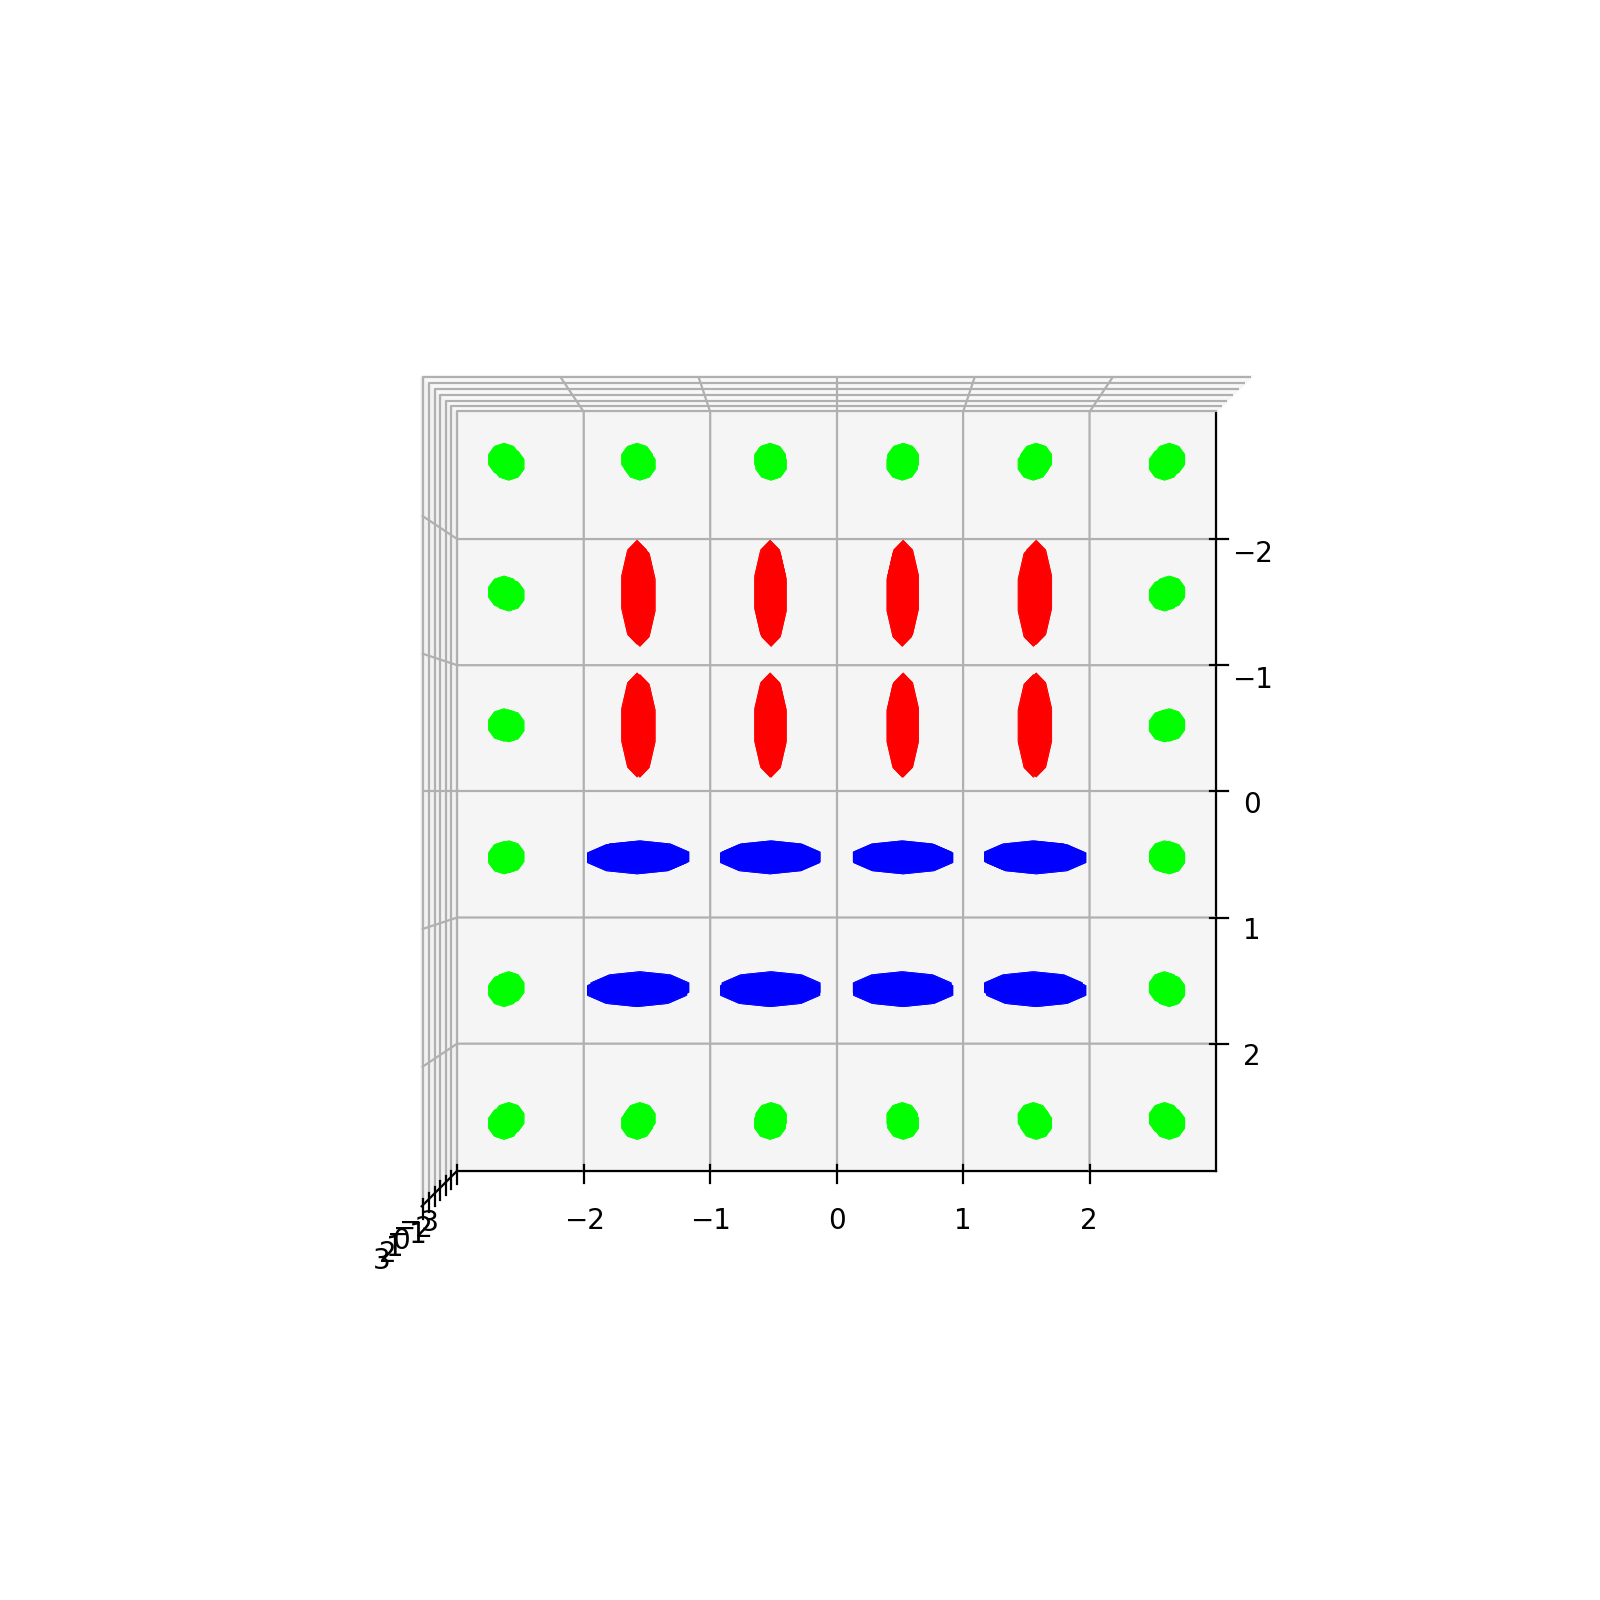

In [10]:
from matplotlib import cm

f = plt.figure(figsize=(8,8))
ax = f.add_subplot(projection='3d')
ax.view_init(elev=90,azim=0)

d = 1
for i in range(0,T.shape[0],d):
    for j in range(0,T.shape[1],d):
        for k in range(0,T.shape[2],d):
            A = T[i,j,k]
            A12 = sqrtm(A)
            Z0 = A12[0,0]*Y0 + A12[0,1]*Y1 + A12[0,2]*Y2
            Z1 = A12[1,0]*Y0 + A12[1,1]*Y1 + A12[1,2]*Y2
            Z2 = A12[2,0]*Y0 + A12[2,1]*Y1 + A12[2,2]*Y2
            scale = 0.125#*FA[i,j]        
            ax.plot_surface(scale*Z0+X[i,j,k,1],scale*Z1+X[i,j,k,0],scale*Z2+X[i,j,k,2],shade=False,color=np.abs(v[i,j,k,-2]),edgecolor=None)
            ax.set_zlim(-X.shape[0]/2,X.shape[0]/2)

In [11]:
tensors = T

# define function to construct rotation matrix from axis of rotation and angle
rot = lambda n, theta : np.array([[np.cos(theta)+n[...,0,None]**2*(1-np.cos(theta)), n[...,0,None]*n[...,1,None]*(1-np.cos(theta))-n[...,2,None]*np.sin(theta), n[...,0,None]*n[...,2,None]*(1-np.cos(theta))+n[...,1,None]*np.sin(theta)],
                                [n[...,0,None]*n[...,1,None]*(1-np.cos(theta))+n[...,2,None]*np.sin(theta), np.cos(theta)+n[...,1,None]**2*(1-np.cos(theta)), n[...,1,None]*n[...,2,None]*(1-np.cos(theta))-n[...,0,None]*np.sin(theta)],
                                [n[...,0,None]*n[...,2,None]*(1-np.cos(theta))-n[...,1,None]*np.sin(theta), n[...,1,None]*n[...,2,None]*(1-np.cos(theta))+n[...,0,None]*np.sin(theta), np.cos(theta)+n[...,2,None]**2*(1-np.cos(theta))]]).squeeze().transpose(2,3,4,0,1)

# compute unit eigenvectors, e, of tensors
w,e = np.linalg.eigh(tensors)
e1 = e[...,0]
e2 = e[...,1]
# compute unit vectors n1 and n2 in the directions of J@e1 and J@e2
Je1 = np.squeeze(J @ e1[...,None])
n1 = Je1 / np.linalg.norm(Je1, axis=-1)[...,None]
Je2 = np.squeeze(J @ e2[...,None])
n2 = Je2 / np.linalg.norm(Je2, axis=-1)[...,None]
# compute a rotation matrix, R1, that maps e1 onto n1
theta = np.arccos(np.squeeze(e1[..., None, :] @ n1[..., None]))[...,None]
r = np.cross(e1,n1) / np.sin(theta)
R1 = rot(r,theta)
# compute a secondary rotation, about n1, to map e2 from its position after the first rotation, R1 @ e2,
# to the n1-n2 plane.
Pn2 = n2 - (n2[..., None, :] @ n1[..., None])[...,0] * n1
Pn2 = Pn2 / np.linalg.norm(Pn2, axis=-1)[...,None]
R1e1 = np.squeeze(R1 @ e1[...,None])
R1e2 = np.squeeze(R1 @ e2[...,None])
phi = np.arccos(np.squeeze(R1e2[..., None, :] @ Pn2[..., None]) / (np.linalg.norm(R1e2) * np.linalg.norm(Pn2)))
R2 = rot(R1e1, phi[...,None])

Q = R2 @ R1

In [12]:
Trot = Q @ T

In [15]:
print('T: ', T[1,1,0,:,:], '\n')
print('Trot: ',Trot[1,1,0,:,:])

T:  [[10.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]] 

Trot:  [[ 0.09820928  0.70710678  0.70703858]
 [-0.09820928  0.70710678 -0.70703858]
 [-9.99903545  0.          0.01388889]]


In [16]:
print('Q: ', Q[1,1,0,:,:], '\n')

Q:  [[ 0.00982093  0.70710678  0.70703858]
 [-0.00982093  0.70710678 -0.70703858]
 [-0.99990354  0.          0.01388889]] 



<IPython.core.display.Javascript object>


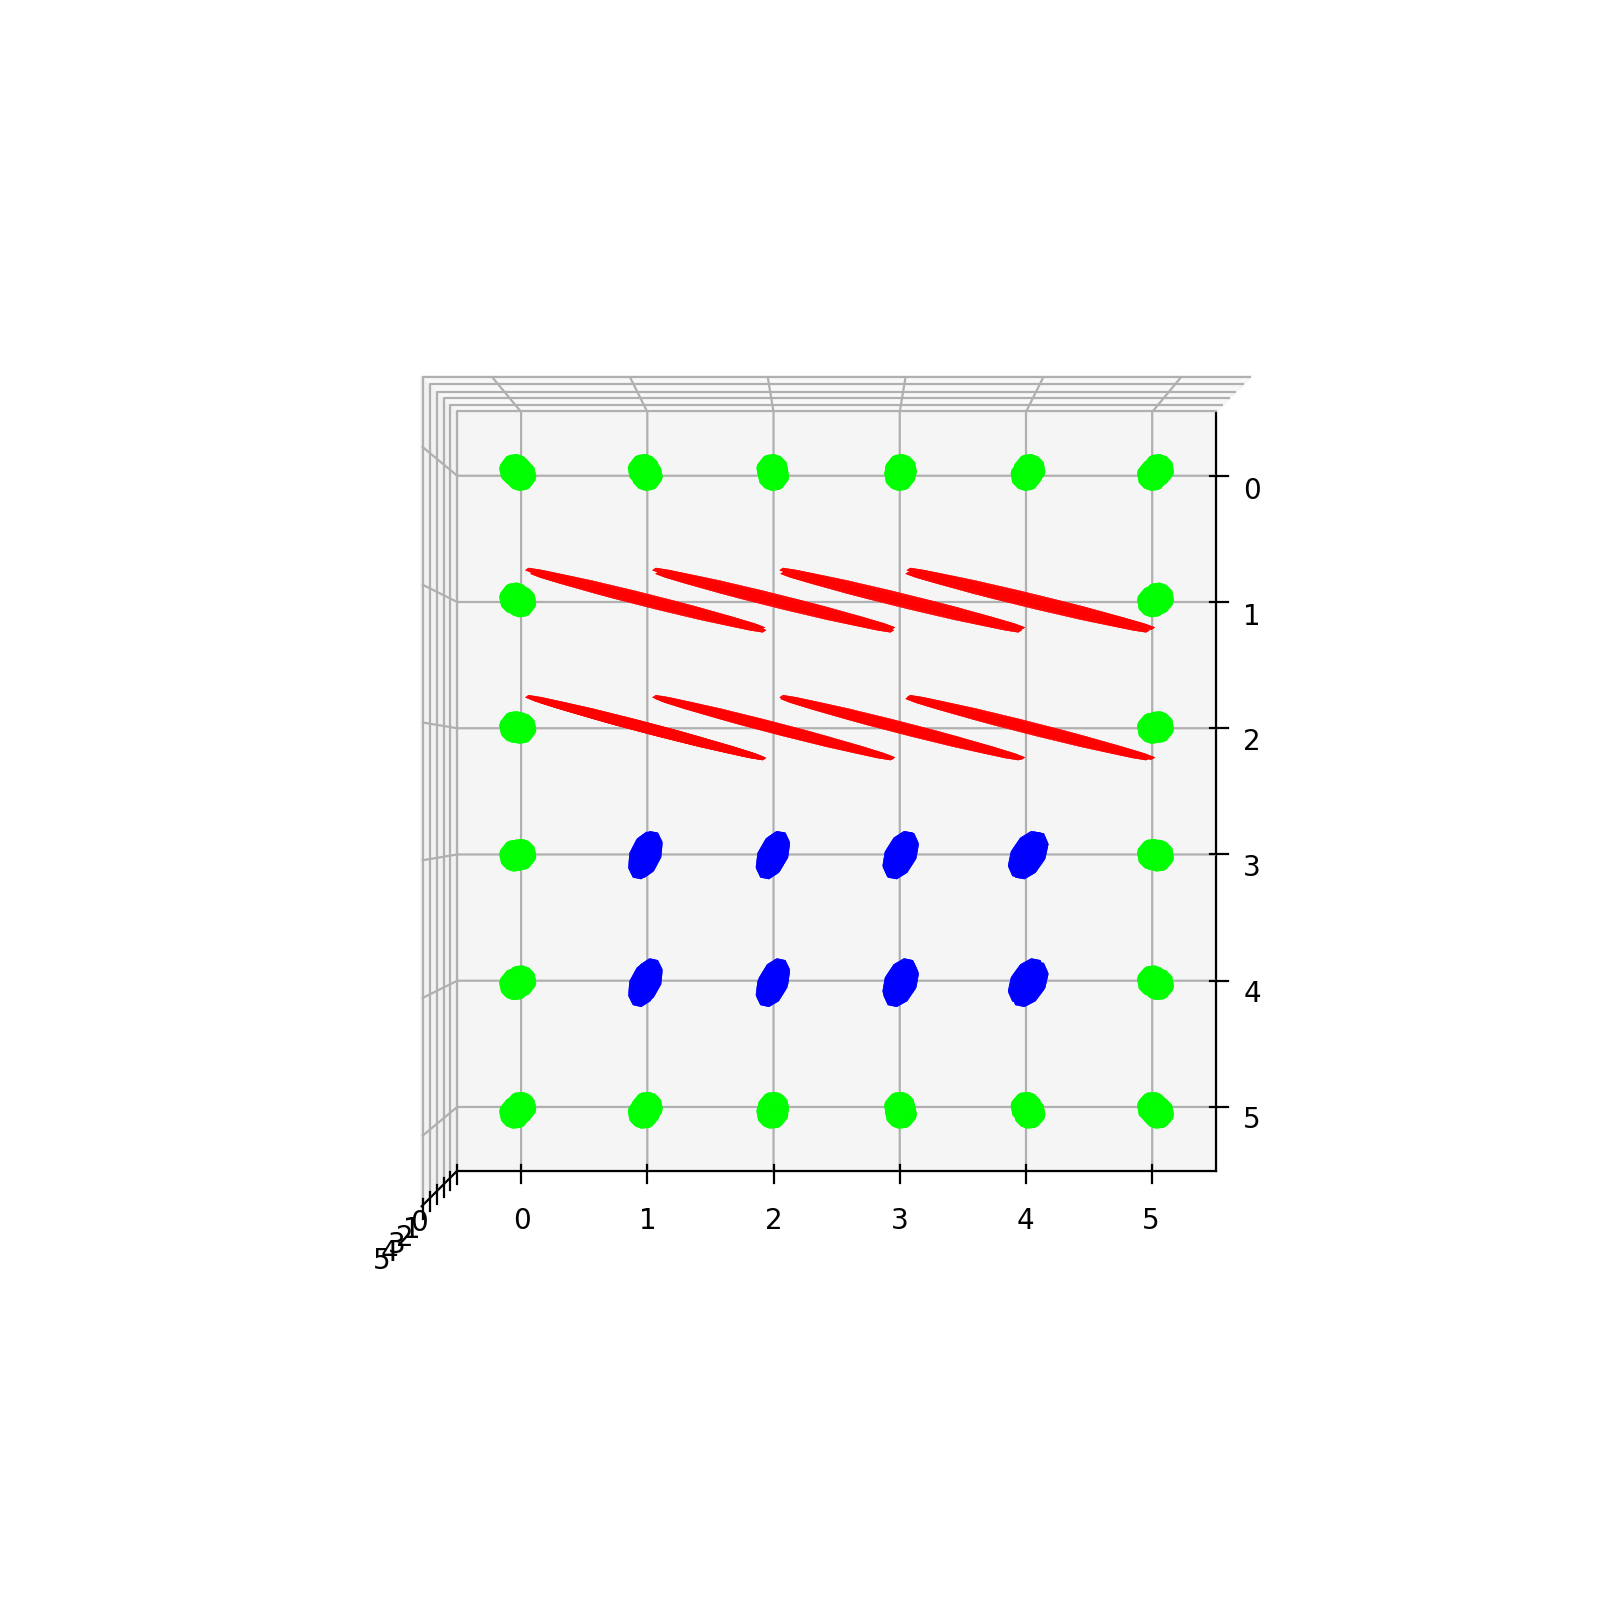

In [98]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(projection='3d')
ax.view_init(elev=90,azim=0)

d = 1
for i in range(0,Trot.shape[0],d):
    for j in range(0,Trot.shape[1],d):
        for k in range(0,Trot.shape[2],d):
            A = Trot[i,j,k]
            A12 = sqrtm(A)
            Z0 = A12[0,0]*Y0 + A12[0,1]*Y1 + A12[0,2]*Y2
            Z1 = A12[1,0]*Y0 + A12[1,1]*Y1 + A12[1,2]*Y2
            Z2 = A12[2,0]*Y0 + A12[2,1]*Y1 + A12[2,2]*Y2
            scale = 0.125#*FA[i,j]        
            ax.plot_surface(scale*Z0+i,scale*Z1+j,scale*Z2+k,shade=False,color=np.abs(v[i,j,k,-2]),edgecolor=None)
            ax.set_zlim(0,5)